In [16]:
import os

from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS


In [17]:
def load_movies(path="../data/raw/"):
    corpus = []
    classes = []
    label = 0
    for cl in os.listdir(path):  # parcours des fichiers d'un répertoire
        for f in os.listdir(path + cl):
            txt = open(path + cl + "/" + f).read()
            corpus.append(txt)
            classes.append(label)
        label += 1  # changer de répertoire <=> changement de classe
    return corpus, classes

alltxts, alllabels = load_movies()

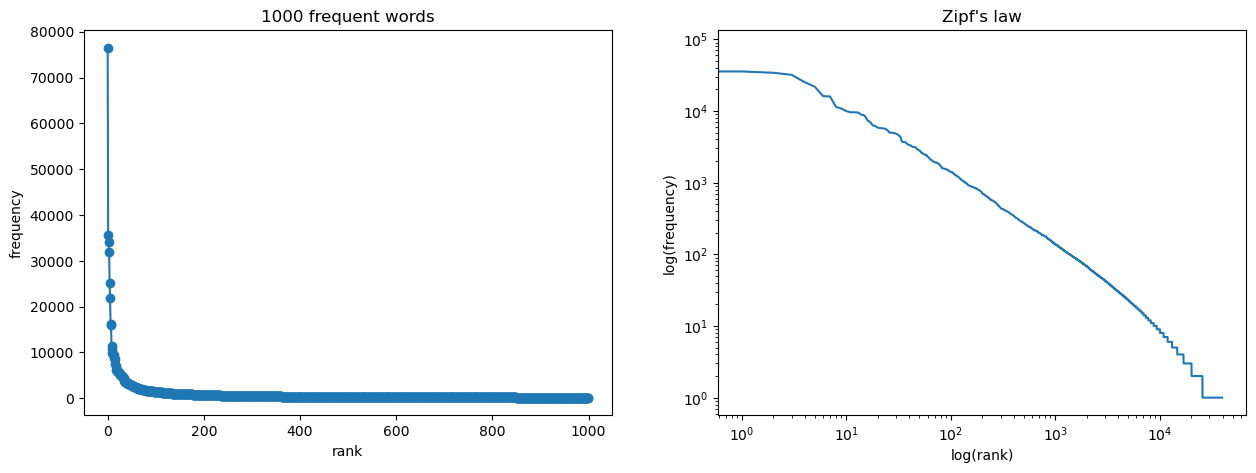

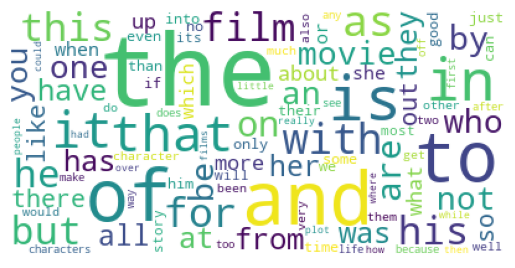

20 most frequent words
the     76529
and     35576
of      34123
to      31937
is      25195
in      21822
it      16107
that    15924
as      11378
with    10792
for      9961
his      9587
this     9578
film     9517
he       8864
but      8634
on       7385
are      6949
by       6261
be       6174
dtype: int64


In [18]:


## BoW (without stopwords)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

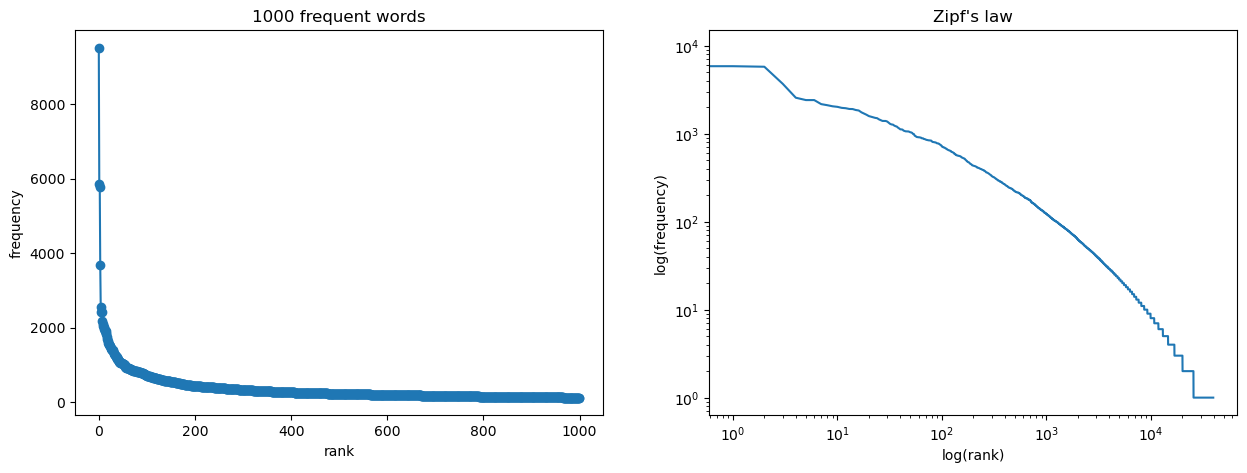

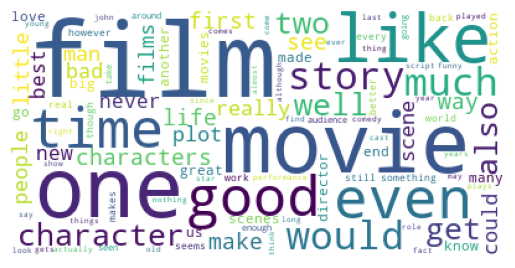

20 most frequent words
film          9517
one           5852
movie         5771
like          3690
even          2565
good          2411
time          2411
story         2169
would         2109
much          2049
character     2020
also          1967
get           1949
two           1911
well          1906
characters    1859
first         1836
see           1749
way           1693
make          1642
dtype: int64


In [19]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

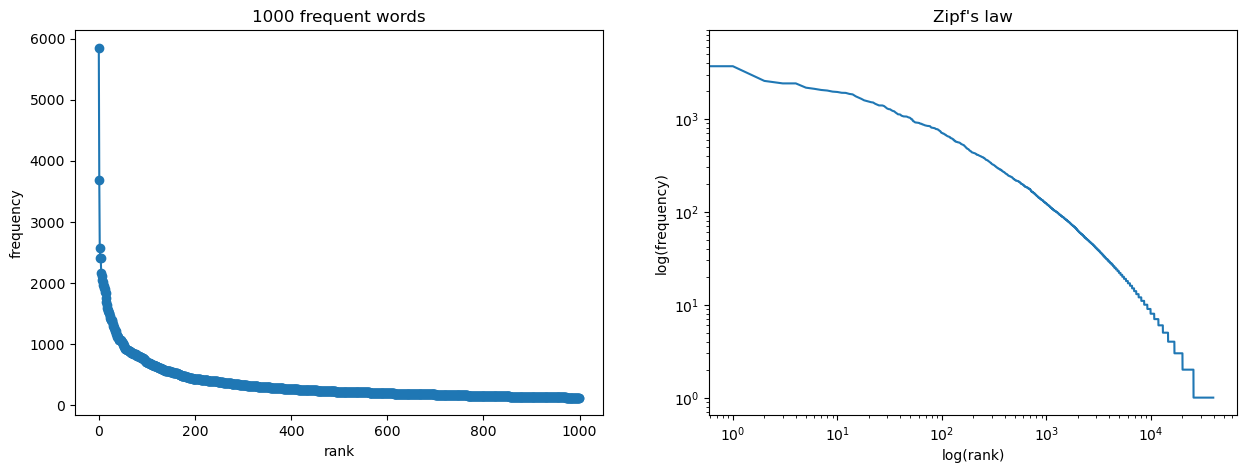

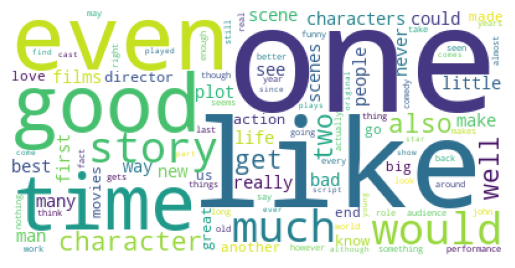

20 most frequent words
one           5852
like          3690
even          2565
time          2411
good          2411
story         2169
would         2109
much          2049
character     2020
also          1967
get           1949
two           1911
well          1906
characters    1859
first         1836
see           1749
way           1693
make          1642
life          1586
really        1558
dtype: int64


In [23]:
## BoW (with stopwords)
sw = stopwords.words("english") + ["film", "movie"]
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

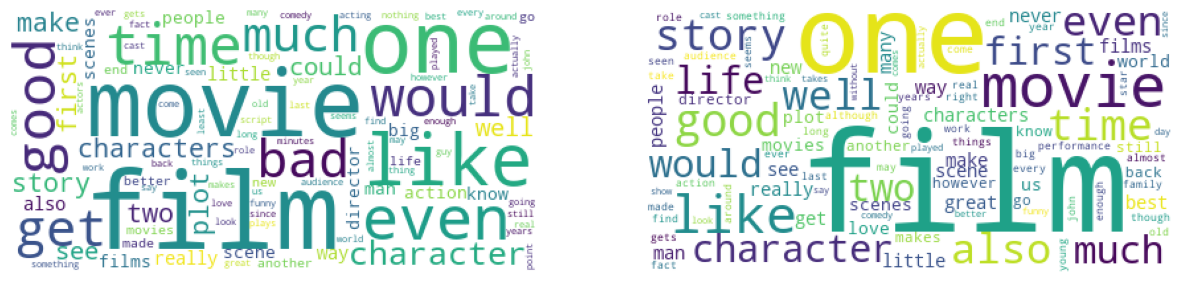

20 most frequent words
film          4287
movie         3246
one           2800
like          1888
even          1386
time          1168
good          1163
would         1090
get           1052
bad           1034
much          1011
character      942
story          923
plot           917
two            912
characters     873
make           851
first          832
could          791
see            784
dtype: int64
film          5230
one           3052
movie         2525
like          1802
good          1248
story         1246
time          1243
also          1200
even          1179
well          1123
character     1078
life          1057
much          1038
would         1019
first         1004
two            999
characters     986
see            965
way            929
get            897
dtype: int64


In [20]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=stopwords.words("english"))
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=stopwords.words("english"))
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud1 = WordCloud(background_color="white", max_words=100)
wordcloud1.generate_from_frequencies(frequent_words1)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.axis("off")
plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])

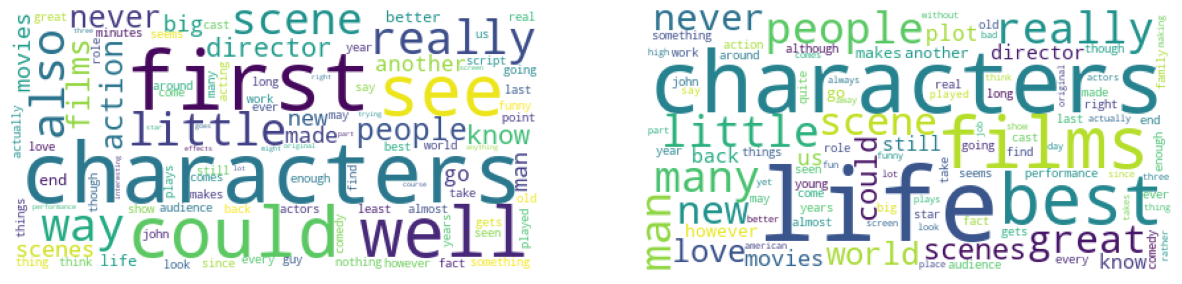

20 most frequent words
characters    873
first         832
could         791
see           784
well          783
really        781
also          767
way           764
little        726
scene         670
people        666
never         653
films         652
action        652
director      651
know          645
scenes        636
man           632
big           597
movies        571
dtype: int64
life          1057
characters     986
films          884
best           829
people         789
many           780
really         777
little         775
man            764
great          751
scene          727
new            723
never          721
world          665
love           661
scenes         638
could          636
movies         635
plot           596
us             588
dtype: int64


In [28]:
## BoW (with stopwords)
vectorizer0 = CountVectorizer(stop_words=sw, max_df=0.5)
X0 = vectorizer0.fit_transform(np.array(alltxts)[np.array(alllabels) == 0])
frequent_words0 = pd.Series(np.array(X0.sum(axis=0))[0], index = sorted(vectorizer0.vocabulary_))

vectorizer1 = CountVectorizer(stop_words=sw, max_df=0.5)
X1 = vectorizer1.fit_transform(np.array(alltxts)[np.array(alllabels) == 1])
frequent_words1 = pd.Series(np.array(X1.sum(axis=0))[0], index = sorted(vectorizer1.vocabulary_))

## 100 most frequent words
wordcloud0 = WordCloud(background_color="white", max_words=100)
wordcloud0.generate_from_frequencies(frequent_words0)
wordcloud1 = WordCloud(background_color="white", max_words=100)
wordcloud1.generate_from_frequencies(frequent_words1)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(wordcloud0)
plt.axis("off")
plt.subplot(122)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words0.sort_values(ascending=False)[:20])
print(frequent_words1.sort_values(ascending=False)[:20])